In [0]:
# -*- coding: utf-8 -*-
#-*- coding: cp950 -*-
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from typing import *

import torch
import torch.optim as optim

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import *
from fastai.core import *

In [3]:
#在colab下接入google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
base_dir = '/content/gdrive/My Drive'
#path = Path(base_dir +'/imgs4')  #imgs
path = Path(base_dir +'/Food11K')
path.mkdir(parents=True,exist_ok=True)
os.chdir(path)

Mounted at /content/gdrive


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Using TensorFlow backend.


In [0]:
!wget https://www.dropbox.com/s/sh5yt160xzqjkk0/Food-11.zip?dl=1

--2020-05-22 02:59:36--  https://www.dropbox.com/s/sh5yt160xzqjkk0/Food-11.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/sh5yt160xzqjkk0/Food-11.zip [following]
--2020-05-22 02:59:36--  https://www.dropbox.com/s/dl/sh5yt160xzqjkk0/Food-11.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5310b631952c04f559b4a93e4.dl.dropboxusercontent.com/cd/0/get/A4I8TpHrr3jPT5FiHRSOrwcMZRZlXpcW1nHFp80FZJ1OSfQ6thFgviQqXAqoW-uMQ4iBQorr4voKEZtdA3VvXn2vxDouqGJpVGZFVtNhR3P46sV5SELAdVwu2A-yoaVW464/file?dl=1# [following]
--2020-05-22 02:59:37--  https://ucb5310b631952c04f559b4a93e4.dl.dropboxusercontent.com/cd/0/get/A4I8TpHrr3jPT5FiHRSOrwcMZRZlXpcW1nHFp80FZJ1OSfQ6thFgviQqXAqoW-uMQ4iBQorr4voKEZtdA3VvXn2vxDouqGJpVGZFVtNhR3P46sV5

In [0]:
!mv Food-11.zip?dl=1 Food_11.zip

In [0]:
!unzip Food_11.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/8_807.jpg      
  inflating: training/8_808.jpg      
  inflating: training/8_809.jpg      
  inflating: training/8_81.jpg       
  inflating: training/8_810.jpg      
  inflating: training/8_811.jpg      
  inflating: training/8_812.jpg      
  inflating: training/8_813.jpg      
  inflating: training/8_814.jpg      
  inflating: training/8_815.jpg      
  inflating: training/8_816.jpg      
  inflating: training/8_817.jpg      
  inflating: training/8_818.jpg      
  inflating: training/8_819.jpg      
  inflating: training/8_82.jpg       
  inflating: training/8_820.jpg      
  inflating: training/8_821.jpg      
  inflating: training/8_822.jpg      
  inflating: training/8_823.jpg      
  inflating: training/8_824.jpg      
  inflating: training/8_825.jpg      
  inflating: training/8_826.jpg      
  inflating: training/8_827.jpg      
  inflating: training/8_828.jpg      
  inflating: training/8_829.jpg      

In [5]:
!ls

'00Food-11K  Recognition VGG16 .ipynb'	 test_op.pkl    validation
'00VGG16_logistic Food-11K 2.ipynb'	 training       val_op.pkl
 evaluation				 train_op.pkl


In [0]:
!rm -rf Food_11.zip

In [8]:
train = [os.path.join("training",img) for img in os.listdir("training")]
val = [os.path.join("validation",img) for img in os.listdir("validation")]
test = [os.path.join("evaluation",img) for img in os.listdir("evaluation")]
len(train),len(val),len(test)
# len(test)

(9866, 3430, 3347)

train = [os.path.join("training",img) for img in os.listdir("training")]
val = [os.path.join("validation",img) for img in os.listdir("validation")]
test = [os.path.join("evaluation",img) for img in os.listdir("evaluation")]
len(train),len(val),len(test)

In [9]:
train[0:5]

['training/0_327.jpg',
 'training/0_173.jpg',
 'training/0_602.jpg',
 'training/0_36.jpg',
 'training/0_108.jpg']

In [10]:
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in val]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in test]
num_classes = 11
# Convert class labels in one hot encoded vector
y_train = []
for x in train_y:
    a = np.array([0]*num_classes)
    a[x] = 1
    y_train.append(a)
y_val = []
for x in val_y:
    a = np.array([0]*num_classes)
    a[x] = 1
    y_val.append(a)
y_test = []
for x in test_y:
    a = np.array([0]*num_classes)
    a[x] = 1
    y_test.append(a)
    
#len(y_train),len(y_val),len(y_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
y_train.shape,y_val.shape,y_test.shape

((9866, 11), (3430, 11), (3347, 11))

In [0]:
import pickle
with open("test_op.pkl","wb") as file:
    pickle.dump(y_test,file)
with open("train_op.pkl","wb") as file:
    pickle.dump(y_train,file)
with open("val_op.pkl","wb") as file:
    pickle.dump(y_val,file)

In [12]:
print("Reading train images..")
X_train = [cv2.resize(cv2.imread(x), dsize=(224,224), interpolation=cv2.INTER_AREA) for x in train]
print("Done.")
len(X_train)

Reading train images..
Done.


9866

In [13]:
model = VGG16(weights="imagenet", include_top=False)
outs = []
for img in X_train:
    x = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
    outs.append(model.predict(x)[0])
    if len(outs) % 100 == 0:
        print(len(outs))
outs = np.array(outs)
outs.shape
# print("creating train features..")
# train_x, train_features, train_features_flatten = create_features(train, model)
# print("creating val features..")
# val_x, val_features, val_features_flatten = create_features(val, model)
# test_x, test_features, test_features_flatten = create_features(test, model)

# print(train_x.shape, train_features.shape, train_features_flatten.shape)
# print(val_x.shape, val_features.shape, val_features_flatten.shape)
# print(test_x.shape, test_features.shape, test_features_flatten.shape)

58892288/58889256 [==============================] - 1s 0us/step
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800


(9866, 7, 7, 512)

In [14]:
print(outs.shape)
with open("train_features.pkl","wb") as file:
    pickle.dump(outs,file)

(9866, 7, 7, 512)


In [15]:
print("Reading val images..")
outs = []
X_train = []
X_val = [cv2.resize(cv2.imread(x), dsize=(224,224), interpolation = cv2.INTER_AREA) for x in val]
print("Done.")
len(X_val)

Reading val images..
Done.


3430

In [16]:
model = VGG16(weights="imagenet", include_top=False)
for img in X_val:
    x = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
    outs.append(model.predict(x)[0])
    if len(outs) % 100 == 0:
        print(len(outs))
outs = np.array(outs)
outs.shape

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400


(3430, 7, 7, 512)

In [17]:
print(outs.shape)
with open("val_features.pkl","wb") as file:
    pickle.dump(outs,file)

(3430, 7, 7, 512)


In [18]:
outs = []
X_val = []
print("Reading test images..")
X_test = [cv2.resize(cv2.imread(x), dsize=(224,224), interpolation = cv2.INTER_AREA) for x in test]
print("Done.")
len(X_test)

Reading test images..
Done.


3347

In [19]:
model = VGG16(weights="imagenet", include_top=False)
for img in X_test:
    x = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
    outs.append(model.predict(x)[0])
    if len(outs) % 100 == 0:
        print(len(outs))
outs = np.array(outs)
outs.shape

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300


(3347, 7, 7, 512)

In [20]:
print(outs.shape)
with open("test_features.pkl","wb") as file:
    pickle.dump(outs,file)

(3347, 7, 7, 512)


In [0]:
outs = []
X_train = []
X_val = []
X_test = []

# val_features = []
# train_features = []
val_features = pickle.load(open("val_features.pkl","rb"))
train_features = pickle.load(open("train_features.pkl","rb"))
test_features = pickle.load(open("test_features.pkl","rb"))

In [0]:
y_test = []
with open("test_op.pkl","rb") as file:
    y_test = pickle.load(file)
y_train = []
with open("train_op.pkl","rb") as file:
    y_train = pickle.load(file)
y_val = []
with open("val_op.pkl","rb") as file:
    y_val = pickle.load(file)

In [23]:
print(train_features.shape, y_train.shape)
print(val_features.shape, y_val.shape)
print(test_features.shape,y_test.shape)

(9866, 7, 7, 512) (9866, 11)
(3430, 7, 7, 512) (3430, 11)
(3347, 7, 7, 512) (3347, 11)


In [24]:
checkpointer = ModelCheckpoint(filepath='transfermodel_best.hdf5',
                               verbose=1,save_best_only=True)
model_transfer = Sequential()
model_transfer.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(120, activation='relu'))
model_transfer.add(Dense(256, activation='relu'))
model_transfer.add(Dense(11, activation='softmax'))
model_transfer.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model_transfer.fit(train_features, y_train, batch_size=64, epochs=30,
          validation_data=(val_features, y_val), callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 9866 samples, validate on 3430 samples
Epoch 1/30
9866/9866 [==============================] - 1s 139us/step - loss: 1.5266 - accuracy: 0.5247 - val_loss: 1.0434 - val_accuracy: 0.6612

Epoch 00001: val_loss improved from inf to 1.04344, saving model to transfermodel_best.hdf5
Epoch 2/30
9866/9866 [==============================] - 1s 109us/step - loss: 0.9916 - accuracy: 0.6732 - val_loss: 0.8642 - val_accuracy: 0.7082

Epoch 00002: val_loss improved from 1.04344 to 0.86416, saving model to transfermodel_best.hdf5
Epoch 3/30
9866/9866 [==============================] - 1s 112us/step - loss: 0.8509 - accuracy: 0.7182 - val_loss: 0.7861 - val_accuracy: 0.7464

Epoch 00003: val_loss improved from 0.86416 to 0.78609, saving model to transfermodel_best.hdf5
Epoch 4/30
9866/9866 [==============================] - 1s 113us/step - loss: 0.7693 - accuracy: 0.7436 - val_loss: 0.7624 - val_accuracy: 0.7522

Epoch 00004: val_loss improved from 0.78609 to 0.76243, saving model to transfer

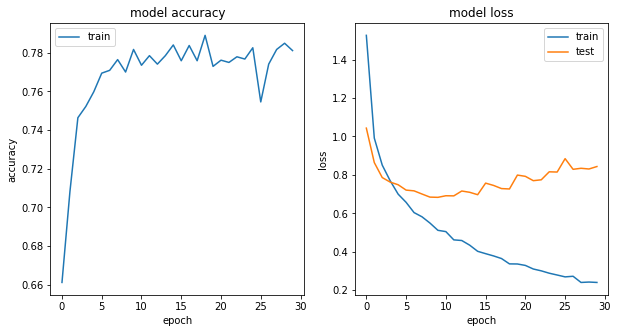

In [25]:
def plot_acc_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
#     plt.plot(history.history['acc'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_acc_loss(history)

In [26]:
model_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               61560     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               30976     
_________________________________________________________________
dense_3 (Dense)              (None, 11)                2827      
Total params: 95,363
Trainable params: 95,363
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.models import Model
intermediate_layer_model = Model(inputs=model_transfer.input,
                                 outputs=model_transfer.get_layer("dense_2").output)

train_feats = intermediate_layer_model.predict(train_features)
train_features = []
val_feats = intermediate_layer_model.predict(val_features)
# val_features = []
test_feats = intermediate_layer_model.predict(test_features)
# test_features = []

train_feats.shape,val_feats.shape,test_feats.shape

((9866, 256), (3430, 256), (3347, 256))

In [28]:
len(train_y), len(val_y), len(test_y)

(9866, 3430, 3347)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=0) --> 78.83 val acc
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=170) # --> 78.65
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=180) # --> 78.74
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=190) # --> 78.77
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=200) # --> 78.86
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=210) # --> 78.54
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=220) # --> 78.51
# clf = RandomForestClassifier(max_depth=28,n_estimators=150,random_state=230) # --> 78.89
# clf = RandomForestClassifier(max_depth=28,n_estimators=200,random_state=230) # --> 78.92
# clf = RandomForestClassifier(max_depth=28,n_estimators=220,random_state=230) # --> 78.95
# clf = RandomForestClassifier(max_depth=30,n_estimators=220,random_state=230) # --> 78.97
# clf = RandomForestClassifier(max_depth=45,n_estimators=220,random_state=230) # --> 79.06
clf = RandomForestClassifier(max_depth=45,n_estimators=220,random_state=230)
clf.fit(train_feats,np.array(train_y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=230,
                       verbose=0, warm_start=False)

In [30]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=230,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=230,
                       verbose=0, warm_start=False)

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma='scale',decision_function_shape='ovo',probability=True)
svc.fit(train_feats,np.array(train_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
SVM_val_outputs = svc.predict(val_feats)
SVM_test_outputs = svc.predict(test_feats)
SVM_val_outputs.shape, SVM_test_outputs.shape
print("SVM accuracies:")
print("val:",accuracy_score(val_y,SVM_val_outputs))
print("test:",accuracy_score(test_y,SVM_test_outputs))

SVM accuracies:
val: 0.7947521865889213
test: 0.8096803107260233


In [34]:
RF_val_outputs = clf.predict(val_feats)
RF_test_outputs = clf.predict(test_feats)
RF_val_outputs.shape, RF_test_outputs.shape
print("RF accuracies:")
print("val:",accuracy_score(val_y,RF_val_outputs))
print("test:",accuracy_score(test_y,RF_test_outputs))

RF accuracies:
val: 0.7854227405247813
test: 0.8031072602330445


In [35]:
tm_val = model_transfer.predict(val_features)
tm_test = model_transfer.predict(test_features)
preds = np.argmax(tm_val, axis=1)
print("Transfer model accuracies:")
print("val", accuracy_score(val_y, preds))
preds2 = np.argmax(tm_test, axis=1)
print("test", accuracy_score(test_y, preds2))

Transfer model accuracies:
val 0.7810495626822157
test 0.7938452345383926


In [36]:
SVM_val_outputs = svc.predict_proba(val_feats)
SVM_test_outputs = svc.predict_proba(test_feats)
SVM_val_outputs.shape, SVM_test_outputs.shape

((3430, 11), (3347, 11))

In [37]:
RF_val_outputs = clf.predict_proba(val_feats)
RF_test_outputs = clf.predict_proba(test_feats)
RF_val_outputs.shape, RF_test_outputs.shape

((3430, 11), (3347, 11))

In [38]:
len(val_y)

3430

In [0]:
# SVM accuracies:
# val: 0.7880466472303207
# test: 0.8037048102778608
# RF accuracies:
# val: 0.79067055393586
# test: 0.8099790857484315
# Transfer model accuracies:
# val 0.7740524781341108
# test 0.7842844338213325
# w1 = 2; w2 = 2; w3 = 1.05 --> 79.09 val acc.

In [40]:
w1 = 2; w2 = 2; w3 = 1.05# 79
finprobs = []
for i in range(3430):
    p1 = SVM_val_outputs[i].argsort()[-5:][::-1]
    p2 = RF_val_outputs[i].argsort()[-5:][::-1]
    p3 = tm_val[i].argsort()[-5:][::-1]
    p1_scores = sorted(SVM_val_outputs[i])[-5:][::-1]
    p2_scores = sorted(RF_val_outputs[i])[-5:][::-1]
    p3_scores = sorted(tm_val[i])[-5:][::-1]
    probs = [0]*11
    for k in range(5):
        if p1[k]==p2[k] and p1[k] == p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k]) + (w3*p3_scores[k])
        elif p1[k]==p2[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])
        elif p2[k]==p3[k]:
            probs[p2[k]] += (w2*p2_scores[k]) + (w3*p3_scores[k])
            probs[p1[k]] += (w1*p1_scores[k])
        elif p1[k]==p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w3*p3_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
        else:
            probs[p1[k]] += (w1*p1_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])

    probs = np.array(probs).argsort()[-5:][::-1]
    finprobs.append(probs[0])
# print("ensembled!",len(finprobs),len(val_y))
print("val:",accuracy_score(val_y,finprobs))

val: 0.7970845481049562


In [41]:
print(len(test_features))
preds = np.argmax(model_transfer.predict(test_features), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(test_y, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(test_y, preds, normalize=False),"\n")
confusion_matrix(test_y, preds, labels=range(0,11))

3347

Accuracy on Test Data:  0.7938452345383926

Number of correctly identified imgaes:  2657 



array([[262,   0,  25,  34, ...,   2,   8,   1,   1],
       [ 11,  67,  37,   6, ...,   0,  10,   3,   1],
       [ 22,   6, 385,  18, ...,   2,  16,  17,   8],
       [ 35,   2,  26, 238, ...,   1,   9,   6,   2],
       ...,
       [  3,   0,   3,   1, ...,  79,   1,   4,   2],
       [  3,   1,  10,   8, ...,   0, 263,   3,   3],
       [  2,   0,  18,   3, ...,   2,   4, 467,   0],
       [  1,   1,  13,  11, ...,   4,  10,   2, 177]])

In [42]:
w1 = 2; w2 = 2; w3 = 1.05# 79
finprobs = []
for i in range(3347):
    p1 = SVM_test_outputs[i].argsort()[-5:][::-1]
    p2 = RF_test_outputs[i].argsort()[-5:][::-1]
    p3 = tm_test[i].argsort()[-5:][::-1]
    p1_scores = sorted(SVM_test_outputs[i])[-5:][::-1]
    p2_scores = sorted(RF_test_outputs[i])[-5:][::-1]
    p3_scores = sorted(tm_test[i])[-5:][::-1]
    probs = [0]*11
    for k in range(5):
        if p1[k]==p2[k] and p1[k] == p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k]) + (w3*p3_scores[k])
        elif p1[k]==p2[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])
        elif p2[k]==p3[k]:
            probs[p2[k]] += (w2*p2_scores[k]) + (w3*p3_scores[k])
            probs[p1[k]] += (w1*p1_scores[k])
        elif p1[k]==p3[k]:
            probs[p1[k]] += (w1*p1_scores[k]) + (w3*p3_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
        else:
            probs[p1[k]] += (w1*p1_scores[k])
            probs[p2[k]] += (w2*p2_scores[k])
            probs[p3[k]] += (w3*p3_scores[k])

    probs = np.array(probs).argsort()[-5:][::-1]
    finprobs.append(probs[0])
print("ensembled!",len(finprobs),len(test_y))
print("val:",accuracy_score(test_y,finprobs))

ensembled! 3347 3347
val: 0.8093815357036152


In [0]:
>>Accuracies
SVM val: 0.7880466472303207
RF val: 0.79067055393586
Transfer model val: 0.7740524781341108
Ensemble model val: 0.7909620991253644¶
w1 = 2; w2 = 2; w3 = 1.05 --> test: 0.8096803107260233